### Simple Recommender System for new anime file

In [28]:
#importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [29]:
#loading the dataset
anime_data = pd.read_csv('DATA/Anime_data.csv')

In [30]:
#viewing the data
anime_data.head(3)

,Anime_id,Title,Genre,Synopsis,Type,Producer,Studio,Rating,ScoredBy,Popularity,Members,Episodes,Source,Aired,Link
0,1,Cowboy Bebop,"['Action', 'Adventure', 'Comedy', 'Drama', 'Sc...","In the year 2071, humanity has colonized sever...",TV,['Bandai Visual'],['Sunrise'],8.81,363889.0,39.0,704490.0,26.0,Original,"Apr 3, 1998 to Apr 24, 1999",https://myanimelist.net/anime/1/Cowboy_Bebop
1,5,Cowboy Bebop: Tengoku no Tobira,"['Action', 'Space', 'Drama', 'Mystery', 'Sci-Fi']","Another day, another bounty—such is the life o...",Movie,"['Sunrise', 'Bandai Visual']",['Bones'],8.41,111187.0,475.0,179899.0,1.0,Original,"Sep 1, 2001",https://myanimelist.net/anime/5/Cowboy_Bebop__...
2,6,Trigun,"['Action', 'Sci-Fi', 'Adventure', 'Comedy', 'D...","Vash the Stampede is the man with a $$60,000,0...",TV,['Victor Entertainment'],['Madhouse'],8.31,197451.0,158.0,372709.0,26.0,Manga,"Apr 1, 1998 to Sep 30, 1998",https://myanimelist.net/anime/6/Trigun


## The features of the dataset are as follows: 
#### -Anime_id : anime Id (as per myanimelist.net)
#### -Title : name of anime
#### -Genre : Main genre
#### -Synopsis : Brief Discription
#### -Rating : Rating of anime as per myanimelist.net/
#### -ScoredBy : Total number of users who scored the given anime
#### -Popularity : Rank of anime based on popularity
#### -Members : Number of members added given anime on their list
#### -Episodes : Number of episodes

In [9]:
anime_data.shape

(17002, 15)

### Removing the camel-casing of the column names

In [10]:
anime_data.columns = map(str.lower, anime_data.columns)
anime_data.head(3)

,anime_id,title,genre,synopsis,type,producer,studio,rating,scoredby,popularity,members,episodes,source,aired,link
0,1,Cowboy Bebop,"['Action', 'Adventure', 'Comedy', 'Drama', 'Sc...","In the year 2071, humanity has colonized sever...",TV,['Bandai Visual'],['Sunrise'],8.81,363889.0,39.0,704490.0,26.0,Original,"Apr 3, 1998 to Apr 24, 1999",https://myanimelist.net/anime/1/Cowboy_Bebop
1,5,Cowboy Bebop: Tengoku no Tobira,"['Action', 'Space', 'Drama', 'Mystery', 'Sci-Fi']","Another day, another bounty—such is the life o...",Movie,"['Sunrise', 'Bandai Visual']",['Bones'],8.41,111187.0,475.0,179899.0,1.0,Original,"Sep 1, 2001",https://myanimelist.net/anime/5/Cowboy_Bebop__...
2,6,Trigun,"['Action', 'Sci-Fi', 'Adventure', 'Comedy', 'D...","Vash the Stampede is the man with a $$60,000,0...",TV,['Victor Entertainment'],['Madhouse'],8.31,197451.0,158.0,372709.0,26.0,Manga,"Apr 1, 1998 to Sep 30, 1998",https://myanimelist.net/anime/6/Trigun


In [11]:
#checking the datatype of each column
anime_data.dtypes

anime_id        int64
title          object
genre          object
synopsis       object
type           object
producer       object
studio         object
rating        float64
scoredby      float64
popularity    float64
members       float64
episodes      float64
source         object
aired          object
link           object
dtype: object

## Some columns like rating, scoredby, popularity, members, episodes need to be typecasted as integers. We'll convert them once we clean all the data.

In [12]:
#creating the function to remove the characters
import re
def clean_up(s):
    return re.sub(r"[^\sa-zA-Z0-9\.\,\;\!\-]","",str(s))

In [13]:
anime_data['title'] = anime_data['title'].apply(clean_up)
anime_data['genre'] = anime_data['genre'].apply(clean_up)
anime_data['producer'] = anime_data['producer'].apply(clean_up)
anime_data['studio'] = anime_data['studio'].apply(clean_up)

In [14]:
#viewing the cleaned data
anime_data.head()

,anime_id,title,genre,synopsis,type,producer,studio,rating,scoredby,popularity,members,episodes,source,aired,link
0,1,Cowboy Bebop,"Action, Adventure, Comedy, Drama, Sci-Fi, Space","In the year 2071, humanity has colonized sever...",TV,Bandai Visual,Sunrise,8.81,363889.0,39.0,704490.0,26.0,Original,"Apr 3, 1998 to Apr 24, 1999",https://myanimelist.net/anime/1/Cowboy_Bebop
1,5,Cowboy Bebop Tengoku no Tobira,"Action, Space, Drama, Mystery, Sci-Fi","Another day, another bounty—such is the life o...",Movie,"Sunrise, Bandai Visual",Bones,8.41,111187.0,475.0,179899.0,1.0,Original,"Sep 1, 2001",https://myanimelist.net/anime/5/Cowboy_Bebop__...
2,6,Trigun,"Action, Sci-Fi, Adventure, Comedy, Drama, Shounen","Vash the Stampede is the man with a $$60,000,0...",TV,Victor Entertainment,Madhouse,8.31,197451.0,158.0,372709.0,26.0,Manga,"Apr 1, 1998 to Sep 30, 1998",https://myanimelist.net/anime/6/Trigun
3,7,Witch Hunter Robin,"Action, Magic, Police, Supernatural, Drama, My...",Witches are individuals with special powers li...,TV,Bandai Visual,Sunrise,7.34,31875.0,1278.0,74889.0,26.0,Original,"Jul 2, 2002 to Dec 24, 2002",https://myanimelist.net/anime/7/Witch_Hunter_R...
4,8,Bouken Ou Beet,"Adventure, Fantasy, Shounen, Supernatural",It is the dark century and the people are suff...,TV,nan,Toei Animation,7.04,4757.0,3968.0,11247.0,52.0,Manga,"Sep 30, 2004 to Sep 29, 2005",https://myanimelist.net/anime/8/Bouken_Ou_Beet


### For the Weighted Score Recommendation System we only need a few columns from the above dataset

In [15]:
#accessing a limited number of columns required for weighted score recommendation
anime_data = anime_data[['title','rating','scoredby','members']]
anime_data

,title,rating,scoredby,members
0,Cowboy Bebop,8.81,363889.0,704490.0
1,Cowboy Bebop Tengoku no Tobira,8.41,111187.0,179899.0
2,Trigun,8.31,197451.0,372709.0
3,Witch Hunter Robin,7.34,31875.0,74889.0
4,Bouken Ou Beet,7.04,4757.0,11247.0
...,...,...,...,...
16997,Sore Ike! Anpanman Anpanman to Kaizoku Lobster,5.50,NaN,70.0
16998,X Bomber,5.94,NaN,199.0
16999,X Bomber Pilot,4.28,NaN,77.0
17000,Ganko-chan,NaN,NaN,11.0


In [16]:
#checking for null values
anime_data.isnull().sum()

title          0
rating      2577
scoredby    3775
members        0
dtype: int64

In [17]:
anime_data.shape

(17002, 4)

### Using a delimiter for 'members' to be greater than 500 members

In [18]:
anime_data =  anime_data[anime_data['members']>=1000]
anime_data

,title,rating,scoredby,members
0,Cowboy Bebop,8.81,363889.0,704490.0
1,Cowboy Bebop Tengoku no Tobira,8.41,111187.0,179899.0
2,Trigun,8.31,197451.0,372709.0
3,Witch Hunter Robin,7.34,31875.0,74889.0
4,Bouken Ou Beet,7.04,4757.0,11247.0
...,...,...,...,...
16981,Mega Man,6.52,NaN,3263.0
16982,A-Ko The Versus,6.49,NaN,2457.0
16983,Magic Knight Rayearth Omake,6.45,NaN,1730.0
16984,Rilu Rilu Fairilu Yousei no Door,6.36,NaN,1293.0


### Let's drop all the rows with NaN's. They will not help us with predicting

In [19]:
anime_data = anime_data.dropna(axis=0)
anime_data

,title,rating,scoredby,members
0,Cowboy Bebop,8.81,363889.0,704490.0
1,Cowboy Bebop Tengoku no Tobira,8.41,111187.0,179899.0
2,Trigun,8.31,197451.0,372709.0
3,Witch Hunter Robin,7.34,31875.0,74889.0
4,Bouken Ou Beet,7.04,4757.0,11247.0
...,...,...,...,...
14875,Tensei shitara Slime Datta Ken Kanwa - Veldora...,6.38,16344.0,33325.0
14876,One Punch Man 2nd Season Commemorative Special,6.67,3945.0,15827.0
15007,Yamiyo,7.81,1659.0,3396.0
15008,Yamiyo,7.81,1659.0,3396.0


## 'rating' , 'scoredby' , 'members' and 'episodes' need to be integers.

In [20]:
anime_data = anime_data.astype({'scoredby':'int64','members':'int64'})
anime_data

,title,rating,scoredby,members
0,Cowboy Bebop,8.81,363889,704490
1,Cowboy Bebop Tengoku no Tobira,8.41,111187,179899
2,Trigun,8.31,197451,372709
3,Witch Hunter Robin,7.34,31875,74889
4,Bouken Ou Beet,7.04,4757,11247
...,...,...,...,...
14875,Tensei shitara Slime Datta Ken Kanwa - Veldora...,6.38,16344,33325
14876,One Punch Man 2nd Season Commemorative Special,6.67,3945,15827
15007,Yamiyo,7.81,1659,3396
15008,Yamiyo,7.81,1659,3396


In [21]:
#checking out the number of unique animes
anime_data['title'].nunique()

7235

In [22]:
anime_data = anime_data.drop_duplicates()
anime_data= anime_data.reset_index()
anime_data = anime_data.drop(columns='index')
anime_data

,title,rating,scoredby,members
0,Cowboy Bebop,8.81,363889,704490
1,Cowboy Bebop Tengoku no Tobira,8.41,111187,179899
2,Trigun,8.31,197451,372709
3,Witch Hunter Robin,7.34,31875,74889
4,Bouken Ou Beet,7.04,4757,11247
...,...,...,...,...
7245,Hataraku Saibou Specials,6.92,161,6982
7246,Tensei shitara Slime Datta Ken Kanwa - Veldora...,6.38,16344,33325
7247,One Punch Man 2nd Season Commemorative Special,6.67,3945,15827
7248,Yamiyo,7.81,1659,3396


# A recommender system that recommends the highest rated anime to a user

Using the Weighted Average Formula AND the members column based on popularity
WR = (RV + Cm/V+m) where:
- V is the number of votes
- m is minimum votes required to be listed
- R is rating average of the anime
- C is mean vote across whole report

In [23]:
#finding the weighted average for each anime
V = anime_data['scoredby']                       #number of votes for each anime
R = anime_data['rating']                     #average voting rating for each anime
C = anime_data['rating'].mean()              #mean vote across the whole report
m = anime_data['scoredby'].quantile(0.80)        #minimum votes requires to be among the top 

anime_data['weighted_avg'] = ((R*V)+(C*m))/(V+m)     #used by imdb to calculate weighted average of movies

In [24]:
anime_data.head()

,title,rating,scoredby,members,weighted_avg
0,Cowboy Bebop,8.81,363889,704490,8.704377
1,Cowboy Bebop Tengoku no Tobira,8.41,111187,179899,8.165875
2,Trigun,8.31,197451,372709,8.171891
3,Witch Hunter Robin,7.34,31875,74889,7.154045
4,Bouken Ou Beet,7.04,4757,11247,6.902548


In [25]:
#recommending the top 10 anime with the highest weighted average
wavg = anime_data.sort_values('weighted_avg', ascending = False)
wavg.head()

,title,rating,scoredby,members,weighted_avg
3090,Fullmetal Alchemist Brotherhood,9.25,730784,1194518,9.183654
6170,Kimi no Na wa.,9.19,467437,724490,9.090456
3816,Steins;Gate,9.14,561405,1005781,9.058318
4219,Hunter x Hunter 2011,9.11,400879,716409,8.998727
5638,Koe no Katachi,9.04,293169,507502,8.895247


Text(0, 0.5, 'Anime Title')

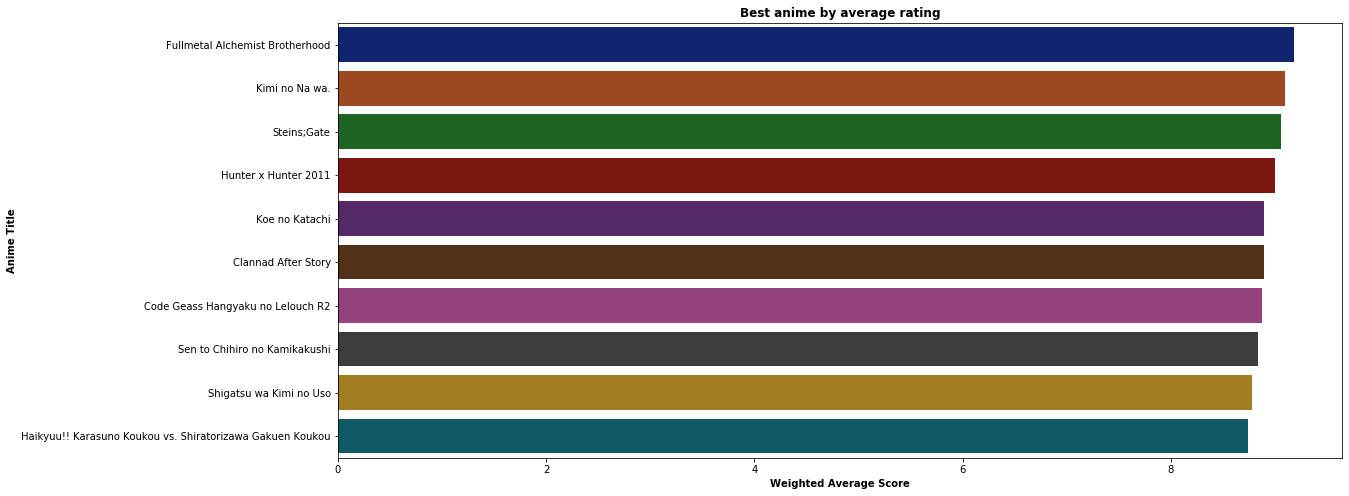

In [26]:
#plotting the top 10 anime according to weighted average
plt.figure(figsize=(18,8))

ax = sns.barplot(x = wavg['weighted_avg'].head(10), y = wavg['title'].head(10), data =wavg, palette='dark')

plt.title('Best anime by average rating', weight = 'bold')
plt.xlabel('Weighted Average Score', weight = 'bold')
plt.ylabel('Anime Title', weight = 'bold')

#plt.savefig('best_anime using weighted avg.png')

### Recommending according to the anime with the largest members

In [27]:
#sorting data according to their popularity
anime_members = anime_data.sort_values('members',ascending = False)
anime_members.head(20)

,title,rating,scoredby,members,weighted_avg
1228,Death Note,8.67,1006242,1451708,8.633285
4652,Shingeki no Kyojin,8.49,936784,1340641,8.454563
4278,Sword Art Online,7.64,913806,1297309,7.622758
3090,Fullmetal Alchemist Brotherhood,9.25,730784,1194518,9.183654
5753,One Punch Man,8.73,687965,1015163,8.675027
5198,Tokyo Ghoul,8.01,656039,1008192,7.974734
3396,Angel Beats!,8.31,640177,1007952,8.264374
3816,Steins;Gate,9.14,561405,1005781,9.058318
1261,Code Geass Hangyaku no Lelouch,8.79,625466,983674,8.727766
10,Naruto,7.88,645672,975394,7.848275


Text(0, 0.5, 'Anime Title')

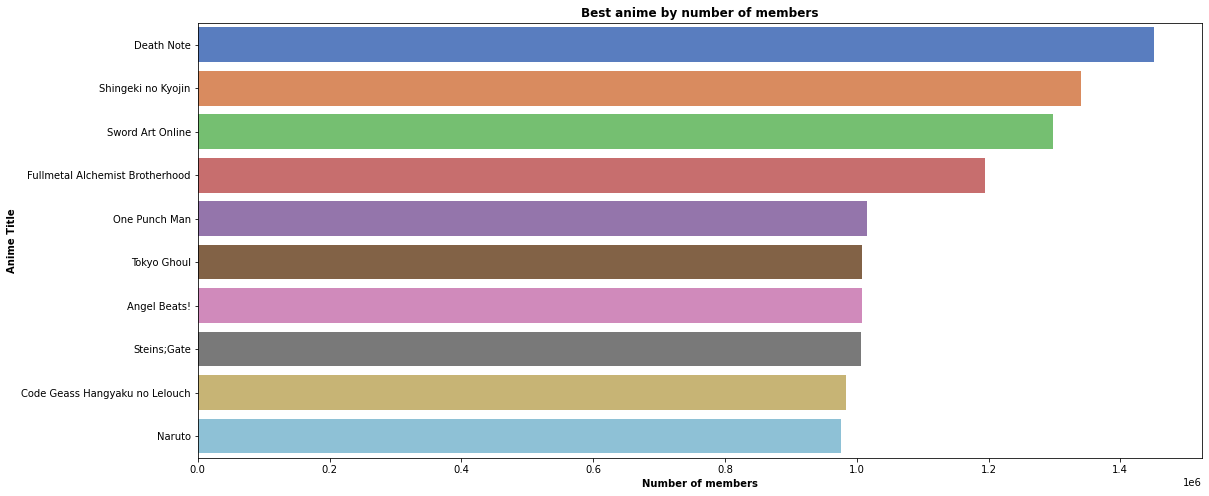

In [23]:
#plotting the top 10 anime according to their members
plt.figure(figsize=(18,8))

ax = sns.barplot(x = anime_members['members'].head(10), y = anime_members['title'].head(10), data = anime_members, palette='muted')

plt.title('Best anime by number of members', weight = 'bold')
plt.xlabel('Number of members', weight = 'bold')
plt.ylabel('Anime Title', weight = 'bold')

#plt.savefig('best_anime using members.png')

# Recommending Anime according to the weighted ratings and members 

In [24]:
#recommending movies based on weighted average and popularity
#normalizing the weighted average and popularity column

from sklearn import preprocessing

min_max_scaler = preprocessing.MinMaxScaler()
data_scaled = min_max_scaler.fit_transform(anime_data[['weighted_avg','members']])
data_norm = pd.DataFrame(data_scaled, columns = ['weighted_avg','members'])
data_norm.head()

,weighted_avg,members
0,0.899049,0.484928
1,0.785624,0.123318
2,0.786891,0.256225
3,0.572501,0.050932
4,0.519527,0.007063


In [27]:
#creating a score value that splits scaled weighted_avg and popularity in half
anime_data[['norm_weighted_avg','norm_members']] = data_norm
anime_data['score'] = anime_data['norm_weighted_avg']*0.5 + anime_data['norm_members']*0.5
data_scored = anime_data.sort_values(['score'], ascending=False)
data_scored.head()

,title,rating,scoredby,members,weighted_avg,norm_weighted_avg,norm_members,score
1228,Death Note,8.67,1006242,1451708,8.633285,0.884075,1.000000,0.942037
3090,Fullmetal Alchemist Brotherhood,9.25,730784,1194518,9.183654,1.000000,0.822714,0.911357
4652,Shingeki no Kyojin,8.49,936784,1340641,8.454563,0.846431,0.923439,0.884935
3816,Steins;Gate,9.14,561405,1005781,9.058318,0.973600,0.692614,0.833107
5753,One Punch Man,8.73,687965,1015163,8.675027,0.892867,0.699081,0.795974


In [29]:
#showing the normalized features and the new score  feature
data_scored[['title','norm_weighted_avg','norm_members','score']].head()

,title,norm_weighted_avg,norm_members,score
1228,Death Note,0.884075,1.000000,0.942037
3090,Fullmetal Alchemist Brotherhood,1.000000,0.822714,0.911357
4652,Shingeki no Kyojin,0.846431,0.923439,0.884935
3816,Steins;Gate,0.973600,0.692614,0.833107
5753,One Punch Man,0.892867,0.699081,0.795974


Text(0, 0.5, 'Movie Title')

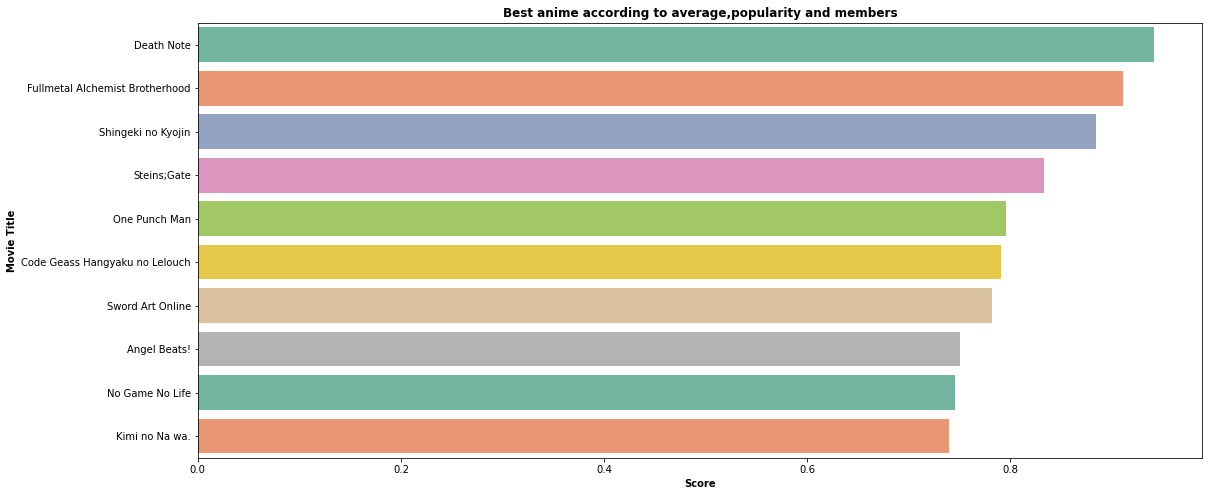

In [30]:
#plotting the top movies according to an even split between weighted avg and popularity

plt.figure(figsize=(18,8))

ax = sns.barplot(x = data_scored['score'].head(10), y = data_scored['title'].head(10), data = data_scored, palette='Set2')


plt.title('Best anime according to average,popularity and members', weight = 'bold')
plt.xlabel('Score', weight = 'bold')
plt.ylabel('Movie Title', weight = 'bold')

#plt.savefig('scored.png')